<a href="https://colab.research.google.com/github/adityajivoji/autoencoder/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries
import torch
import numpy as np
import torchvision
from torch.utils.data import DataLoader
from torch import nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch import optim
from torch.nn import functional as F
from matplotlib import pyplot as plt

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # checking device type

In [ ]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encode_sequence = nn.Sequential(nn.Linear(784, 500), nn.ReLU(), nn.Linear(500, 300), nn.ReLU(), nn.Linear(300, 80), nn.ReLU(), nn.Linear(80, 10))
        self.decode_sequence = nn.Sequential(nn.Linear(10, 80), nn.ReLU(), nn.Linear(80, 300), nn.ReLU(), nn.Linear(300, 500), nn.ReLU(), nn.Linear(500, 784) ,nn.Sigmoid())

    def forward(self, X):
        encoded_data = self.encode_sequence(X)
        decoded_data = self.decode_sequence(encoded_data)
        return decoded_data




In [ ]:
model = autoencoder().to(device)
learning_rate = 0.001
num_epoch = 2
batch_size = 64
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
train_dataset = datasets.MNIST(root = '.', train= True, transform = transforms.ToTensor(), download = True)
train_loader = DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_dataset = datasets.MNIST(root = '.', train= False, transform = transforms.ToTensor(), download = True)
test_loader = DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = True)

In [ ]:
data_list = []
output_list = []
losses = []
for epoch in range(num_epoch): # number of iterations
    for i, (data, targets) in enumerate(train_loader , 0): # one min-batch goes through each iteration of size 64
        # Converting to acceptable format
        data = data.to(device=device)
        
        data = data.reshape(-1, 28*28)
        
        targets = targets.to(device=device)
        output = model(data)
        loss = criterion(output, data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # if i%100 == 0:
        #     print(loss)
        losses.append(loss)
        data_list.append(data)
        output_list.append(output)


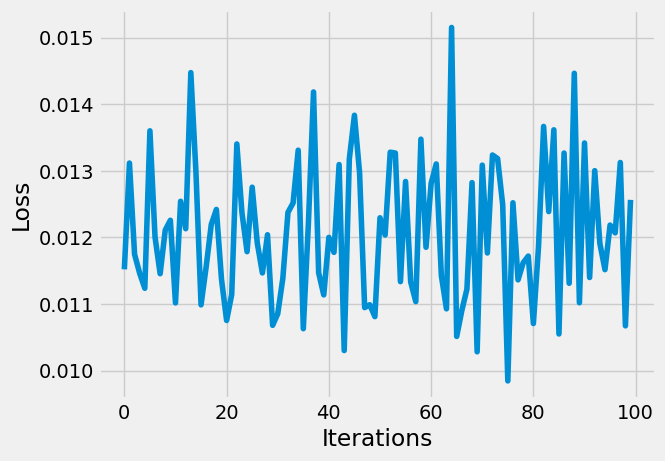

In [ ]:

epochs = 2
outputs = []
losses = []
for epoch in range(epochs):
    for (data, _) in train_loader:
        
      # Reshaping the image to (-1, 784)
      data = data.reshape(-1, 28*28)
        
      # Output of Autoencoder
      output = model(data)
        
      # Calculating the loss function
      loss = criterion(output, data)
        
      # The gradients are set to zero,
      # the the gradient is computed and stored.
      # .step() performs parameter update
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
        
      # Storing the losses in a list for plotting
      losses.append(loss)
    outputs.append((epochs, data, output))
  
# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
  
# Plotting the last 100 values
plt.plot(losses[-100:])

In [ ]:
plt.xlabel('Iterations')
plt.ylabel('Loss')
  
# Plotting the last 100 values
plt.plot(losses[-100:])

RuntimeError: ignored

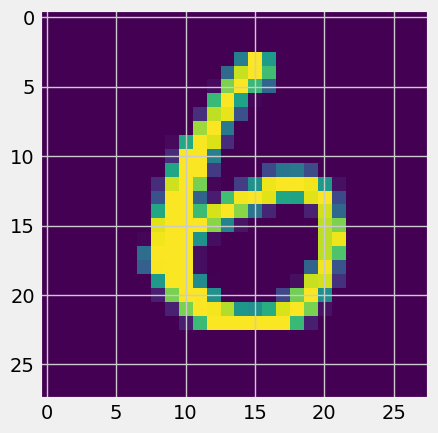

In [ ]:

for i, item in enumerate(image):
    
  # Reshape the array for plotting
  item = item.reshape(-1, 28, 28)
  plt.imshow(item[0].numpy())
  
for i, item in enumerate(reconstructed):
  item = item.reshape(-1, 28, 28)
  plt.imshow(item[0].numpy())